<h1><b>META ANALYSIS</b></h1>

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

<h2>INTRODUCTION</h2>

In [130]:
data = {
    "Country": ["Afghanistan", "Malawi", "South Africa", "Uganda", "Iraq", "Pakistan", "Bangladesh"],
    "Cholera Cases": [1045, 41533, 1272, 65, 13, 6231, 495433],
    "Cholera Deaths": [25, 1192, 47, 9, 0, 0, 29],
    "COVID-19 Cases": [155000, 6700, 3500000, 120000, 25000, 0, 0],
    "COVID-19 Deaths": [6500, 2200, 90000, 3000, 0, 0, 0],
    "Date": ["July - August", "Jan - August", "Jan - July", "August", "(June 2022)", "April", "(2022)"]
}

df = pd.DataFrame(data)

df

,Country,Cholera Cases,Cholera Deaths,COVID-19 Cases,COVID-19 Deaths,Date
0,Afghanistan,1045,25,155000,6500,July - August
1,Malawi,41533,1192,6700,2200,Jan - August
2,South Africa,1272,47,3500000,90000,Jan - July
3,Uganda,65,9,120000,3000,August
4,Iraq,13,0,25000,0,(June 2022)
5,Pakistan,6231,0,0,0,April
6,Bangladesh,495433,29,0,0,(2022)


<b>GENERATING VISUALIZATION</b>

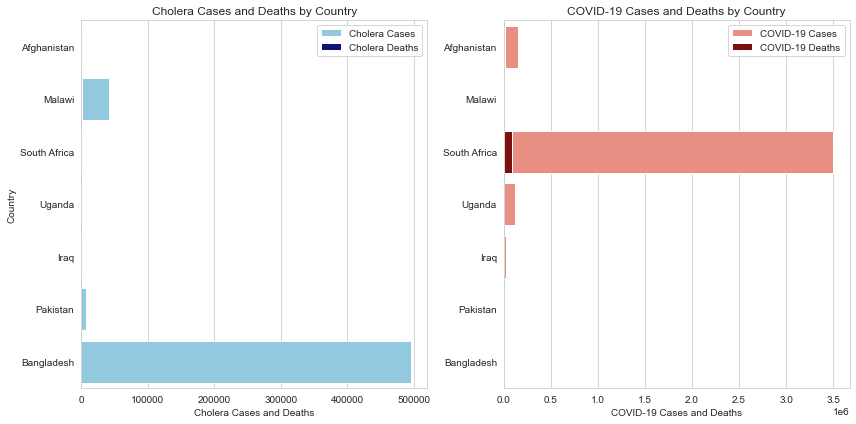

In [131]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot of Cholera Cases and Cholera Deaths
plt.subplot(1, 2, 1)
sns.barplot(x="Cholera Cases", y="Country", data=df, label="Cholera Cases", color="skyblue")
sns.barplot(x="Cholera Deaths", y="Country", data=df, label="Cholera Deaths", color="darkblue")
plt.title("Cholera Cases and Deaths by Country")
plt.xlabel("Cholera Cases and Deaths")
plt.ylabel("Country")
plt.legend()

# Plot COVID-19 Cases and COVID-19 Deaths
plt.subplot(1, 2, 2)
sns.barplot(x="COVID-19 Cases", y="Country", data=df, label="COVID-19 Cases", color="salmon")
sns.barplot(x="COVID-19 Deaths", y="Country", data=df, label="COVID-19 Deaths", color="darkred")
plt.title("COVID-19 Cases and Deaths by Country")
plt.xlabel("COVID-19 Cases and Deaths")
plt.ylabel("")
plt.legend()

plt.tight_layout()
plt.show()

<h2><b>RESULTS ANALYSIS</b></h2>

<b>READING DATASET</b>

In [132]:
data = [
    (1, "Orishaba et al", 2022, "Uganda", "Cross-sectional", "<1 to >/= 60 years", "458 cases", "Epidemiological records", "Not Applicable", "Females were more affected by severe diarrhoea compared to males.", "Under or overreporting of case studies", 6),
    (2, "Murhekar et al", 2020, "India", "Population-based seroepidemiological study", "Adults: 700 villages/wards selected from 70 districts of 21 states of India", "28000 households", "Questionnaire and specimen were collected", "Vaccination", "The seroprevalence of SARS-CoV 2 was found to be low among the adult population in India at the beginning of May 2020", "A wide confidence interval", 7),
    (3, "Rahman et al.", 2021, "Bangladesh", "Mixed methodological approach", "18 years or older", "1590 respondents", "Questionnaire", "Not Applicable", "With climatic hazards, COVID-19, and other endemic diseases have a high possibility of aggravating.", "Recall bias", 7),
    (4, "AMANI et al.", 2022, "Cameroon", "Cross-sectional", "All age groups", "366320", "NOT APPLICABLE; Vaccine administration", "Oral Cholera Vaccine (OCV)", "The campaign towards vaccination was effective with over 60% acceptance.", "Misinformation about Cholera vaccine", 7),
    (5, "Christine et al", 2022, "Dhaka, Bangladesh", "Randomized controlled trial", "All age groups (Children and Adults)", "73 households and 284 patients", "Intervention", "Cholera Rapid Response Program", "The study showed a significant reduction in diarrhoea prevalence.", "A small sample size", 6),
    (6, "Ali et al", 2017, "India", "Observational study", "24 states out of 36 states", "27615 cholera cases", "cholera case reports of 2010-2015", "NOT APPLICABLE", "Results showed that higher literacy rates had a lower risk for cholera.", "A limitation of this study is that the cholera data were not community-based.", 7),
    (7, "Deepthi et al", 2013, "India", "Case report (cross-sectional study)", "< 5 years to > 60 years", "73 cases", "Interviews", "Water supply/ Sanitary", "The highest prevalence of cholera was observed among the elderly with the lowest prevalence among the adult.", "Recall bias", 6),
    (8, "Godfrey Bwire et al", 2023, "Uganda", "Observational study", "All age groups (Children and Adults)", "900 households with 4315 participants", "Semi-structured questionnaire", "WASH, OCV, and COVID-19 vaccine", "Low OCV coverage and low COVID-19 vaccine can result in adverse health events.", "Recall bias, sample size determination, household mapping and listing.", 7),
    (9, "Amani et al", 2021, "Cameroon", "Cross-sectional study", "One year and above", "631109 participants", "Vaccination tally sheet", "Campaign on cholera vaccination", "The overall vaccination coverage was 64.4% with a refusal rate ranging between 0-10% depending on the health districts.", "Data gathered is dependent on the available records", 6),
    (10, "Yeboah et al", 2021, "Ghana", "Cross-sectional study", "15-64 years old", "1560 respondents", "interview-structured questionnaire", "Health promotion", "Despite the knowledge of COVID-19, a larger proportion of the population (two-thirds) was unwilling to adopt the basic preventive practices.", "Recall bias", 7),
    (11, "Tahmo et al", 2023, "Nigeria", "Cross-sectional/ Observational study", "States in Nigeria", "Number of COVID-19 cases (Figure not specified except in a graphical representation)", "Health System Records", "Not Applicable", "It was confirmed that the number of Lassa fever cases was significantly dependent on the number of confirmed COVID-19 cases, the number of states affected, and the month of the year.", "Data gathered is dependent on the available records", 6),
    (12, "Albitar and Almasri", 2023, "Syria", "A cross-sectional", "Adolescents and Adults", "1521 participants", "Internet-based survey (Questionnaire)", "Knowledge Assessment on Cholera", "The main sources of information on cholera were school/college (31.7%), social media (28.7%), family and friends (13.2%), and online search engines (11.3%).", "Bias through the Internet that is, only participants who are on the Internet can participate in the study and restricted number of respondents.", 7),
    (13, "Hsiao et al", 2022, "Malawi", "A cross-sectional", "Children (>/= 12 months)", "40 case studies", "Questionnaire (Recruited from the hospital and stool specimen was collected)", "Vaccination Campaign", "The result showed that the basic cost of illness is a burden to Malawi residents.", "The late start of cholera surveillance The study was also not able to collect COI data from Malawi residents", 7),
    (14, "Issahaku et al", 2020, "Ghana", "Descriptive study (Case-Control)", "< 5 years to 25 years old", "704 Patients", "patients' stool samples and structured interview", "Rehydration, Antibiotics treatment", "The result showed that more youths were affected by the cholera outbreak compared to the under-five population (7.8%)", "The study is unable to account for confounding variables.", 6),
    (15, "Salubi and Elliott", 2021, "Nigeria", "Cross-sectional study", "All thirty-six states", "Not Applicable", "Nigeria Centre for Disease Control (NCDC)", "Not Applicable", "The study showed that households using surface water have the highest incidence rate of cholera.", "A limitation of this study was that monthly cholera data were unavailable.", 6),
    (16, "Ateudjieu et al.", 2019, "Cameroon", "Cross-sectional study", "The four cholera-prone districts in Cameroon.", "134 health facilities", "Interview, Questionnaire and Observations on the resources available", "Not Applicable", "The result showed that there are a lot of weaknesses in the preparedness of health facilities in combatting the cholera outbreak", "Data gathered is dependent on the available records and resources accessible at the point of data collection.", 7),
    (17, "Ouamba et al", 2023, "Cameroon", "Cross-sectional study", "Four health areas in Kribi were targeted with individuals greater than one-year-old", "1533 households with 5877 individuals", "The patient list for those admitted to healthcare facilities The household contact list held by the intervention team The data collected within the target area by the intervention team", "Health promotion, oral cholera vaccination, antibiotic chemoprophylaxis for nonimmunized direct contacts, point-of-use water treatment and active case-finding.", "Oral cholera vaccination increased overall immunization coverage in Kribi by 30.1%", "Limited supply of oral cholera vaccine. Readiness of participants to receive vaccine", 7),
    (18, "Sow et al", 2022, "Nigeria", "Observational study", "Nigeria cholera cases", "Not Applicable", "Policy", "Not Applicable", "Policy briefs can provide insights to health professionals in order to tackle diseases outbreaks", "Publication is extremely dependent on the policies of WHO, UNICEF, and CDC", 4),
]

df = pd.DataFrame(data, columns=[
    'S/N', 'Author', 'Year', 'Country', 'Study Design', 'Population and Study Settings',
    'Sample Size', 'Mode of Data Collection', 'Intervention', 'Results', 'Limitations', 'Quality Assessment Score'
])

<b>ENCODING & GENERATING DATAFRAME COLUMN</b>

In [133]:
encoding_map = {
    "All age groups": 100,
    "All age groups (Children and Adults)": 100,
    "<1 to >/= 60 years": 100,
    "Adults: 700 villages/wards selected from 70 districts of 21 states of India": 50,
    "18 years or older": 54.54,
    "24 states out of 36 states": 66.67,
    "< 5 years to > 60 years": 85.71,
    "One year and above": 95.24,
    "15-64 years old": 46.43,
    "States in Nigeria": 55.56,
    "Adolescents and Adults": 54.54,
    "Children (>/= 12 months)": 25,
    "< 5 years to 25 years old": 35.71,
    "All thirty-six states": 100,
    "The four cholera-prone districts in Cameroon.": 25,
    "Four health areas in Kribi were targeted with individuals greater than one-year-old": 25,
    "Nigeria cholera cases": 55.56
}

df["Population and Study Encoded"] = df["Population and Study Settings"].apply(lambda setting: encoding_map[setting])

df

,S/N,Author,Year,Country,Study Design,Population and Study Settings,Sample Size,Mode of Data Collection,Intervention,Results,Limitations,Quality Assessment Score,Population and Study Encoded
0,1,Orishaba et al,2022,Uganda,Cross-sectional,<1 to >/= 60 years,458 cases,Epidemiological records,Not Applicable,Females were more affected by severe diarrhoea...,Under or overreporting of case studies,6,100.00
1,2,Murhekar et al,2020,India,Population-based seroepidemiological study,Adults: 700 villages/wards selected from 70 di...,28000 households,Questionnaire and specimen were collected,Vaccination,The seroprevalence of SARS-CoV 2 was found to ...,A wide confidence interval,7,50.00
2,3,Rahman et al.,2021,Bangladesh,Mixed methodological approach,18 years or older,1590 respondents,Questionnaire,Not Applicable,"With climatic hazards, COVID-19, and other end...",Recall bias,7,54.54
3,4,AMANI et al.,2022,Cameroon,Cross-sectional,All age groups,366320,NOT APPLICABLE; Vaccine administration,Oral Cholera Vaccine (OCV),The campaign towards vaccination was effective...,Misinformation about Cholera vaccine,7,100.00
4,5,Christine et al,2022,"Dhaka, Bangladesh",Randomized controlled trial,All age groups (Children and Adults),73 households and 284 patients,Intervention,Cholera Rapid Response Program,The study showed a significant reduction in di...,A small sample size,6,100.00
5,6,Ali et al,2017,India,Observational study,24 states out of 36 states,27615 cholera cases,cholera case reports of 2010-2015,NOT APPLICABLE,Results showed that higher literacy rates had ...,A limitation of this study is that the cholera...,7,66.67
6,7,Deepthi et al,2013,India,Case report (cross-sectional study),< 5 years to > 60 years,73 cases,Interviews,Water supply/ Sanitary,The highest prevalence of cholera was observed...,Recall bias,6,85.71
7,8,Godfrey Bwire et al,2023,Uganda,Observational study,All age groups (Children and Adults),900 households with 4315 participants,Semi-structured questionnaire,"WASH, OCV, and COVID-19 vaccine",Low OCV coverage and low COVID-19 vaccine can ...,"Recall bias, sample size determination, househ...",7,100.00
8,9,Amani et al,2021,Cameroon,Cross-sectional study,One year and above,631109 participants,Vaccination tally sheet,Campaign on cholera vaccination,The overall vaccination coverage was 64.4% wit...,Data gathered is dependent on the available re...,6,95.24
9,10,Yeboah et al,2021,Ghana,Cross-sectional study,15-64 years old,1560 respondents,interview-structured questionnaire,Health promotion,"Despite the knowledge of COVID-19, a larger pr...",Recall bias,7,46.43


In [134]:
df.describe()

,S/N,Year,Quality Assessment Score,Population and Study Encoded
count,18.000000,18.000000,18.000000,18.000000
mean,9.500000,2020.833333,6.444444,65.275556
std,5.338539,2.502939,0.783823,28.793977
min,1.000000,2013.000000,4.000000,25.000000
25%,5.250000,2020.250000,6.000000,47.322500
50%,9.500000,2021.500000,7.000000,55.560000
75%,13.750000,2022.000000,7.000000,98.810000
max,18.000000,2023.000000,7.000000,100.000000


<b>USER DEFINED STATISTICAL FUNCTIONS</b>

In [135]:
def check_float(val):
    try:
        return float(val)
    except ValueError:
        return None
    
def convert_sample_size(value):
    if isinstance(value, str):
        value = value.split()[0]
        if value.isdigit():
            return int(value)
    return 0 
    
def calculate_weights(df):
    sample_size = []
    total_sample_size = 0
    for index, row in df.iterrows():
        sample_size_weight = row['Sample Size'].split(' ')[0]
        try:
            sample_size_int = int(sample_size_weight)
            total_sample_size += sample_size_int
            sample_size.append(sample_size_int)
        except ValueError:
            sample_size.append(0)
    print(sample_size)    
    total_quality_score = df['Quality Assessment Score'].sum()

    weights = []
    for index, row in df.iterrows():
        if sample_size[index] > 1000:
            seed = 10
            sample_size_weight = sample_size[index] * np.exp(-10) + seed
        elif sample_size[index] > 400 and sample_size[index] < 1000:
            seed = 5
            sample_size_weight = sample_size[index] * np.exp(-10) + seed
        else:
            sample_size_weight = sample_size[index] * np.exp(-10)
        quality_score_weight = row['Quality Assessment Score'] / total_quality_score if not np.isnan(row['Quality Assessment Score']) else 0
        combined_weight = sample_size_weight * quality_score_weight
        weights.append(min(combined_weight, 1))

    return weights


def calculate_cohens_d(df):
    effect_sizes = []
    for index, row in df.iterrows():
        mean_group_one = check_float(row['Sample Size'].split(' ')[0])
        mean_group_two = check_float(row["Population and Study Encoded"])
        std_group_one = check_float(row['Sample Size'].split(' ')[0])
        std_group_two = check_float(row["Population and Study Encoded"])
            
        if mean_group_one is not None and std_group_one is not None and mean_group_two is not None and std_group_two is not None:
            n1 = mean_group_one
            n2 = mean_group_two
            pooled_std = np.sqrt((((n1 - 1) * std_group_one**2) + ((n2 - 1) * std_group_two**2)) / (n1 + n2 - 2))
            cohens_d = (mean_group_one - mean_group_two) / pooled_std
            effect_sizes.append(cohens_d)
        elif mean_group_one is not None and std_group_one is not None:
            cohens_d = mean_group_one / std_group_one
            effect_sizes.append(cohens_d)
        elif mean_group_two is not None and std_group_two is not None:
            cohens_d = mean_group_two / std_group_two
            effect_sizes.append(cohens_d)
        else:
            effect_sizes.append(0)  # Append a default value (0) when no effect size can be calculated
    formatted_es = ["{:.2f}".format(effect_size) for effect_size in effect_sizes]  
    print(formatted_es)
    return effect_sizes


In [136]:
weights = calculate_weights(df.copy())
weights

[458, 28000, 1590, 366320, 73, 27615, 73, 900, 631109, 1560, 0, 1521, 40, 704, 0, 134, 1533, 0]


[0.2596961983360975,
 0.6801585020124744,
 0.6078043208470384,
 1,
 0.00017142387272386524,
 0.6791037364029063,
 0.00017142387272386524,
 0.30418982377158327,
 1,
 0.6077221313190202,
 0.0,
 0.6076152849325963,
 0.00010958603735772206,
 0.2602738733044546,
 0.0,
 0.00036711322514836894,
 0.6076481607438038,
 0.0]

<h2><b>FOREST PLOT</b></h2>

[458, 28000, 1590, 366320, 73, 27615, 73, 900, 631109, 1560, 0, 1521, 40, 704, 0, 134, 1533, 0]
['0.86', '1.00', '0.98', '1.00', '-0.30', '1.00', '-0.16', '0.94', '1.00', '0.98', '1.00', '0.98', '0.43', '0.97', '1.00', '0.88', '0.99', '1.00']


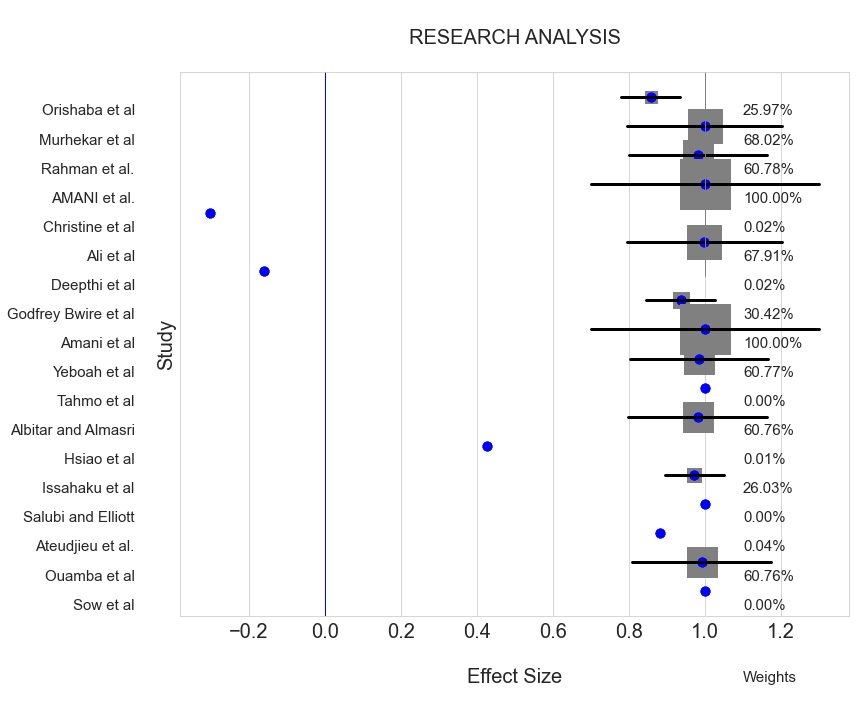

In [137]:
study_labels = df['Author'].tolist()

# Create the forest plot
fig, ax = plt.subplots(figsize=(12, 10))
confidence_interval_width = 0.3
weights = calculate_weights(df.copy())
effect_sizes = calculate_cohens_d(df.copy())
yerr = [weight * confidence_interval_width for weight in weights]

spacing_factor = 2.5
for i, effect_size in enumerate(effect_sizes):
    if effect_size is not None:
        y_pos = i * spacing_factor
        marker_size = weights[i] * 50
        
        # Plot the effect size marker
        ax.plot([effect_size, effect_size], [y_pos, y_pos], "s", color="grey", markersize=marker_size)
        ax.plot([effect_size, effect_size], [y_pos, y_pos], "o", color="blue", markersize=9)

        # Plot the confidence interval line
        lower = effect_size - yerr[i]
        upper = effect_size + yerr[i]
        ax.plot([lower, upper], [y_pos, y_pos], color="black", linewidth=3)

# Add vertical lines for spacing
for i in range(len(effect_sizes)):
    if i < len(effect_sizes) and effect_sizes[i] is not None:
        y_pos = i * spacing_factor + 0.5 * spacing_factor
        ax.axvline(x=1, ymin=y_pos - 0.25 * spacing_factor, ymax=y_pos + 0.25 * spacing_factor, color='grey', linewidth=1)

# Add author labels on the left
for i, label in enumerate(study_labels):
    if i < len(effect_sizes) and effect_sizes[i] is not None:
        y_pos = i * spacing_factor + 0.5 * spacing_factor
        ax.text(-0.5, y_pos, label, ha='right', va='center', fontsize=15)

# Add weight labels on the right
for i, weight in enumerate(weights):
    if i < len(effect_sizes) and effect_sizes[i] is not None:
        y_pos = i * spacing_factor + 0.5 * spacing_factor
        ax.text(1.1, y_pos, f'{weight:.2%}', ha='left', va='center', fontsize=15)

ax.text(1.1, 20 * spacing_factor, 'Weights', ha='left', va='center', fontsize=15)
ax.axvline(0, color='blue', linewidth=1)
ax.set_yticks([])
ax.set_ylabel('Study', fontsize=20)
ax.set_xlabel('\nEffect Size\n', fontsize=20)
ax.set_title("\nRESEARCH ANALYSIS\n", fontsize=20)
ax.tick_params(axis='both', labelsize=20)

ax.invert_yaxis()
plt.show()

WEIGHTED MEAN OF EFFECT SIZES

In [138]:
es = [float(i) for i in effect_sizes]

numero = np.multiply(weights, es)
sum_this = np.sum(numero)
sum_A = np.sum(weights)
result = sum_this / sum_A
result

0.9843898056914033

STANDARD ERROR OF EFFECT SIZES

In [139]:
sum_sqr_inv_es = 0
for item in es:
  if item != 0:
    sum_sqr_inv_es += (item - np.mean(es))**2
    
SD  = np.sqrt((sum_sqr_inv_es)/(len(es)))
SD #Standard Deviation
SE = SD/np.sqrt(len(es))
SE

0.09200086844395303

<h3><b>VACCINATION AS A TOOL IN COVID-19 AND CHOLERA PREVENTION</b></h3>

In [140]:
data = {
    "Location": ["Cholera outbreak in South India (Karnataka)", "Cholera case fatality rate in Cameroon", "Public willingness to preventive measures in general", "Public willingness to preventive measures in general", "Public willingness to preventive measures in general", "Cholera vaccination campaign in Cameroon", "Households in South India (Karnataka)", "Households in South India (Karnataka)", "Households in South India (Karnataka)"],
    "Condition/Treatment/Disease": ["Cholera outbreak", "Cholera case fatality rate", "Willingness to wear face masks", "Willingness to wash hands frequently", "Willingness to maintain social distancing", "Vaccination coverage", "Households not purifying drinking water", "Affected households not drinking purified water", "Households practicing open field defecation"],
    "Percentage": [17.5, 4.3, 28.7, 31.7, 28.0, 64, 81, 92.9, 78.6],
    "Description": ["Cholera outbreak with 73 reported cases.", "High cholera case fatality rate.", "Low willingness to wear face masks.", "Low willingness to wash hands frequently.", "Low willingness to maintain social distancing.", "Overall vaccination coverage.", "Households not purifying drinking water.", "Affected households not drinking purified water.", "Households practicing open field defecation."],
    "Reference": ["Deepthi et al., 2013", "Amani et al., 2021", "Yeboah et al., 2021", "Yeboah et al., 2021", "Yeboah et al., 2021", "Amani et al., 2021", "Deepthi et al., 2013", "Deepthi et al., 2013", "Deepthi et al., 2013"]
}

df = pd.DataFrame(data)
df

,Location,Condition/Treatment/Disease,Percentage,Description,Reference
0,Cholera outbreak in South India (Karnataka),Cholera outbreak,17.5,Cholera outbreak with 73 reported cases.,"Deepthi et al., 2013"
1,Cholera case fatality rate in Cameroon,Cholera case fatality rate,4.3,High cholera case fatality rate.,"Amani et al., 2021"
2,Public willingness to preventive measures in g...,Willingness to wear face masks,28.7,Low willingness to wear face masks.,"Yeboah et al., 2021"
3,Public willingness to preventive measures in g...,Willingness to wash hands frequently,31.7,Low willingness to wash hands frequently.,"Yeboah et al., 2021"
4,Public willingness to preventive measures in g...,Willingness to maintain social distancing,28.0,Low willingness to maintain social distancing.,"Yeboah et al., 2021"
5,Cholera vaccination campaign in Cameroon,Vaccination coverage,64.0,Overall vaccination coverage.,"Amani et al., 2021"
6,Households in South India (Karnataka),Households not purifying drinking water,81.0,Households not purifying drinking water.,"Deepthi et al., 2013"
7,Households in South India (Karnataka),Affected households not drinking purified water,92.9,Affected households not drinking purified water.,"Deepthi et al., 2013"
8,Households in South India (Karnataka),Households practicing open field defecation,78.6,Households practicing open field defecation.,"Deepthi et al., 2013"


<b>GRAPHICAL ANALYSIS</b>

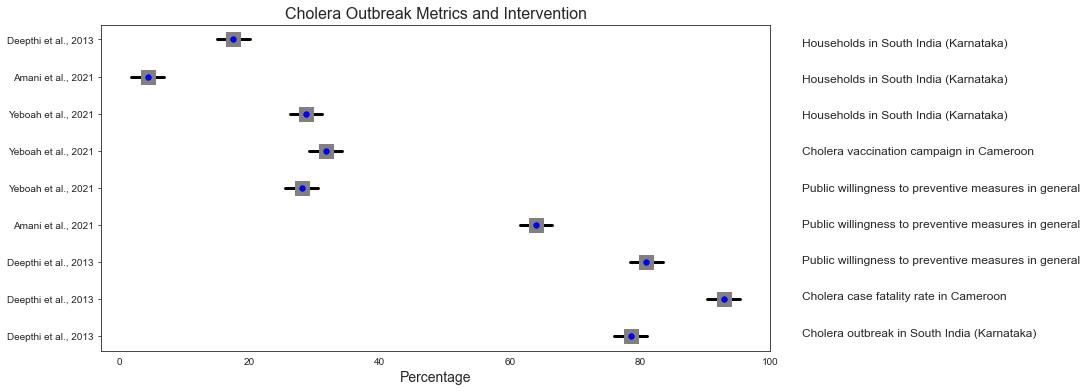

In [141]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.set_style("white")
ax1.grid(False)

for i in range(len(df)):
    lower = df["Percentage"][i] - 2.5
    upper = df["Percentage"][i] + 2.5

    ax1.plot([lower, upper], [i, i], color="black", linewidth=3)
    ax1.plot([df["Percentage"][i], df["Percentage"][i]], [i, i], "s", color="grey", markersize=14)
    ax1.plot([df["Percentage"][i], df["Percentage"][i]], [i, i], "o", color="blue", markersize=5)

yticks = [i for i in range(len(df))]
ax1.set_yticks(yticks)
ax1.set_yticklabels(df["Reference"], ha="right")

ax2 = ax1.twinx()

ymin, ymax = ax1.get_ylim()
ymin += 1.4

n_studies = len(df)
for i, label in enumerate(df["Location"]):
    y_coord = ymin * (i + 0.49) / n_studies
    ax2.text(105, y_coord, label, ha="left", va="center", fontsize=12)

ax2.set_yticks([])
ax2.set_ylabel("")

ax1.set_title("Cholera Outbreak Metrics and Intervention", fontsize=16)
ax1.set_xlabel("Percentage", fontsize=14)
ax1.invert_yaxis()
plt.show()


<h3>HEALTH PROMOTION AND SENSITIZATION AGAINST COVID-19 AND CHOLERA</h3>

In [142]:
data = {
    'Country': ['Ghana', 'Ghana', 'Ghana', 'Ghana', 'Syria', 'Syria', 'Syria', 'Syria', 'Syria', 'Syria'],
    'Findings': ['Average COVID-19 knowledge score', 'Willingness to be vaccinated against COVID-19',
                 'Unwillingness to follow basic COVID-19 preventive measures', 'Fully vaccinated against COVID-19',
                 'Population aware of cholera', 'Primary source of cholera information', 'Awareness of cholera transmission',
                 'Awareness of cholera treatment', 'Awareness of cholera complications', 'Thorough knowledge of cholera complications'],
    'Percentage': [70, 35.3, 64.7, 3, 50, 31.7, 90, 100, 100, 10]
}

df = pd.DataFrame(data)
df

,Country,Findings,Percentage
0,Ghana,Average COVID-19 knowledge score,70.0
1,Ghana,Willingness to be vaccinated against COVID-19,35.3
2,Ghana,Unwillingness to follow basic COVID-19 prevent...,64.7
3,Ghana,Fully vaccinated against COVID-19,3.0
4,Syria,Population aware of cholera,50.0
5,Syria,Primary source of cholera information,31.7
6,Syria,Awareness of cholera transmission,90.0
7,Syria,Awareness of cholera treatment,100.0
8,Syria,Awareness of cholera complications,100.0
9,Syria,Thorough knowledge of cholera complications,10.0


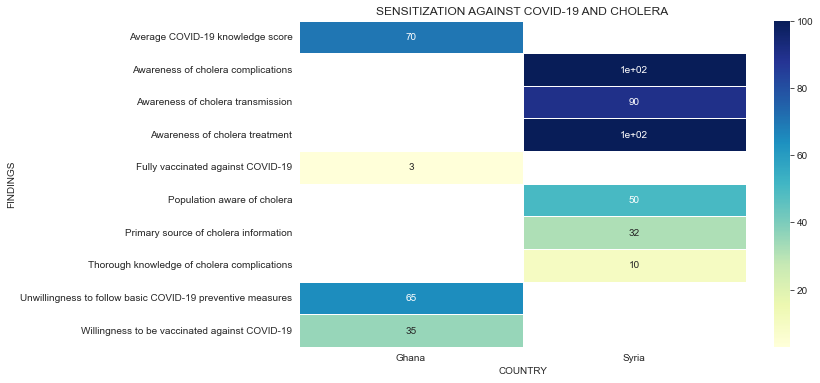

In [143]:
heatmap_data = df.pivot_table(index='Findings', columns='Country', values='Percentage')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title('SENSITIZATION AGAINST COVID-19 AND CHOLERA')
plt.xlabel('COUNTRY')
plt.ylabel('FINDINGS')
plt.show()

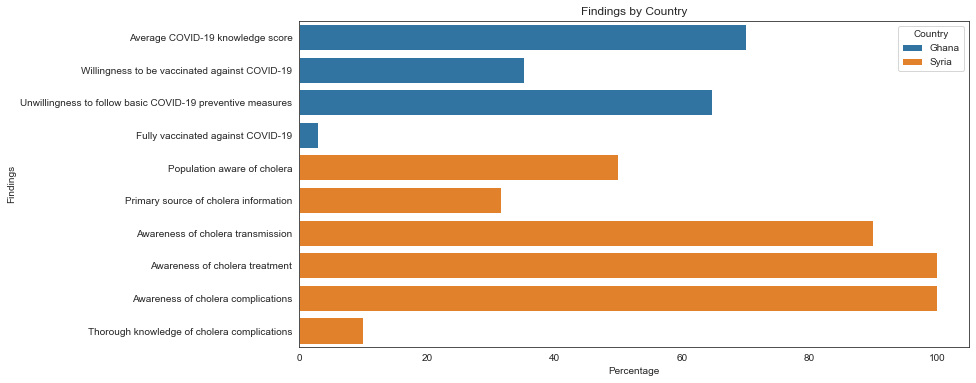

In [144]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='Findings', hue='Country', data=df)
plt.title('Findings by Country')
plt.xlabel('Percentage')
plt.ylabel('Findings')
plt.show()

<h3><b>NIGERIAN CASE STUDY</b></h3>

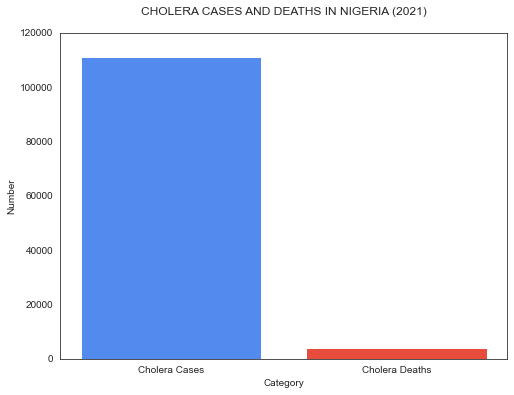

In [145]:
data = {
    "Country": "Nigeria",
    "Year": 2021,
    "Cholera Cases": 111062,
    "Cholera Deaths": 3887,
    "Cholera Case Fatality Rate": 3.5
}

labels = ["Cholera Cases", "Cholera Deaths"]
values = [data["Cholera Cases"], data["Cholera Deaths"]]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=["#528aee", "#e74c3c"])
plt.title("CHOLERA CASES AND DEATHS IN NIGERIA (2021)\n")
plt.xlabel("Category")
plt.ylabel("Number")
plt.ylim(0, 120000)
plt.show()


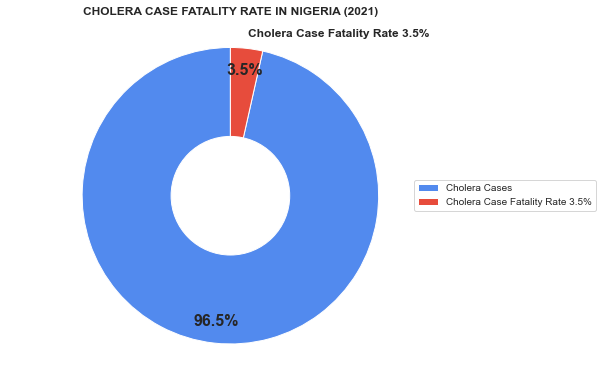

In [146]:
sns.set_style("whitegrid")

category = "Cholera Case Fatality Rate"
percentage = data[category]

fig, ax = plt.subplots(figsize=(8, 6))

wedges, texts, autotexts = ax.pie([100 - percentage, percentage], labels=[f'', f'{category} {percentage}%'],
                                 colors=["#528aee", "#e74c3c"], autopct='%1.1f%%', startangle=90, pctdistance=0.85)

for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=16, weight='bold')

center_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
legend_labels = ['Cholera Cases', f'{category} {percentage}%']
ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

plt.title(f'{category.upper()} IN NIGERIA (2021)\n', weight='bold')
plt.show()